---
WBT-MBT2-25E <i>Programming Python for Bioinformatics</i> &copy; 2020-2023 Michal Bukowski (m.bukowski@uj.edu.pl) Department of Analytical Biochemistry, Faculty of Biochemistry, Biophysics and Biotechnology, Jagiellonian University

---

<p style="font-family:Sans;font-size:12pt;font-weight:bold">Before you start</p>

Import `numpy` as `np`, `pandas` as `pd` and `matplotlib.pyplot` as `plt`. From `sklearn.linear_model` import also `LinearRegression`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Run the code below to ensure that the way you see plots in the notebook is the same way those plots will be saved to files.


In [3]:
%config InlineBackend.print_figure_kwargs = \
    {'bbox_inches':None}


<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddeeff;border-radius:15px">Linear regression on simulated data</p>

Now we will prepare a simple line plot, however to make it more interesting we generate some data from a linear function and perform linear regression with scikit-learn.

---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">1. Generate data from a linear function</p>

Following the lecture materials set numpy random seed to `2`. Feel free to experiment with different values of the seed once your code works well. Next generate vectors of values `X` and `Y` based on the following function: $y~=~2.3 \cdot x~+~1.4$. Add to `Y` values some random noise from normal distribution of standard deviation `0.8`.

Make the `X` vector contain `6` values from `0.0` to `5.0`. You may achieve that either by using `np.arange(start, stop, step)` or what is even better in this case: `np.linspace(start, stop, number)`. It allows you to obtain a vector of values from `start` to `end` (in contrast to the former method, here `end` is inclusive) with the `number` of evenly spaced values.

Here you will find documentation for methods you may want to use: [np.random.seed()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html), 
[np.linespace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), 
[np.random.normal()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html).

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<pre style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
[0. 1. 2. 3. 4. 5.] [ 1.06659372  3.65498654  4.29104312  9.61221665  9.16525153 12.22660211]
</pre>

In [7]:
np.random.seed(2) 
start = 0.0
stop = 5.0
number = 6
X = np.linspace(start, stop, number)
Y = 2.3 * X + 1.4
Y = np.random.normal(Y, 0.8)
print(X)
print(Y)

[0. 1. 2. 3. 4. 5.]
[ 1.06659372  3.65498654  4.29104312  9.61221665  9.16525153 12.22660211]


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">2. Linear regression</p>

Create a new `LinearRegression` object and use it to perform the regression from `X` to `Y`.

As the method `fit()` accepts properly shaped arrays, you will have to reshape `X` and `Y` vectors by using the method `reshape()` and passing to it a tuple with a new shape: `(-1, 1)`. It will change your 1-D vectors into 2D-arrays, as scikit-learn `fit()` methods in general expect an array of vectors with predictor values for each data point and a similar array of vectors with expected response values. Perform the reshaping on site (in the function call), keep the original vectors as they are.

    [0.0,       [[0.0],
     1.0,        [1.0],
     2.0,  --->  [2.0],
     3.0,        [3.0],
     4.0,        [4.0],
     5.0]        [5.0]]
     
In case the number of predictors/response values is greater than 1 (each row is one data point):

    [[x1, x2, ...],        [[y1, y2, ...],
     [x1, x2, ...],         [y1, y2, ...],
     [x1, x2, ...],  --->   [y1, y2, ...],
     [x1, x2, ...],         [y1, y2, ...],
     [x1, x2, ...],         [y1, y2, ...],
     [x1, x2, ...]]         [y1, y2, ...]]
     
Finally, print the values of `model.coef__` and `model.intercept__`. By `model` I mean the object returned by the `fit()` method of `LinearRegression` object.

Here you will find necessary documentation: [scikit-learn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [array.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<pre style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
[[2.21862887]] [1.12287677]
</pre>

In [50]:
lr = LinearRegression()
model = lr.fit(X.reshape(-1, 1), Y)
print(model.coef_, model.intercept_)

[2.21862887] 1.1228767713149148


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">3. Predictions using a model</p>

Use the fitted model to create `Y_pred` vector for `X` vector. Remember to reshape the latter whilst passing it as an argument of the `pred()` method. `Y_pred` will contain data that we will use to plot the fitted linear function. Print the vector on the screen.

Should you need any help, refer to the documentation for scikit-lear `LinearRegression` once again.

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<pre style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
[[ 1.12287677]
 [ 3.34150564]
 [ 5.56013451]
 [ 7.77876338]
 [ 9.99739225]
 [12.21602112]]
</pre>

In [16]:
y_pred = model.predict(X.reshape(-1, 1))
print(y_pred)

[ 1.12287677  3.34150564  5.56013451  7.77876338  9.99739225 12.21602112]


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">3. The line plot</p>

Following the lecture materials, plot the simulated data points (`X`, `Y`) and the fitted linear function (`X`, `Y_pred`) to obtain a plot as much similar to the one below as you can :).

Save the plot to `output/regression.png` file with resolution set to 300 dpi and background to non-transparent.

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<p style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
<img width="300" src="ref/regression.png" alt="Linear regression">
</p>

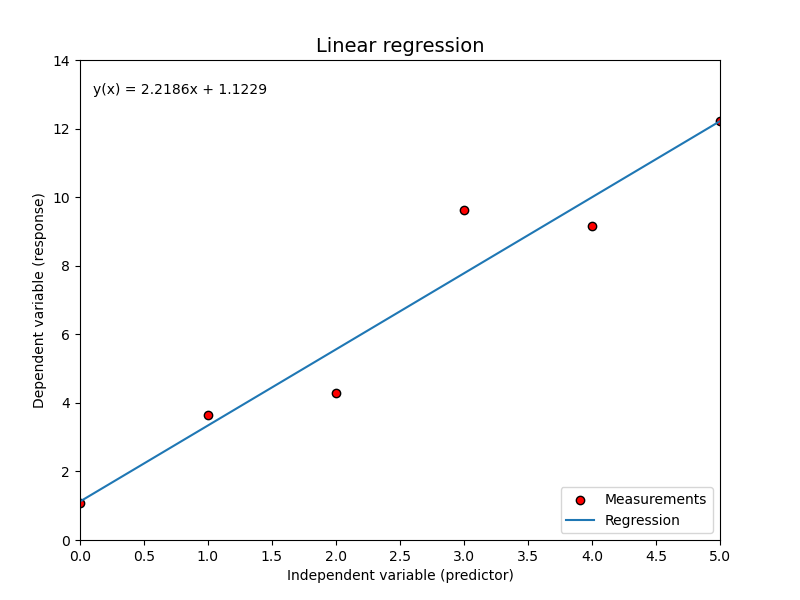

In [274]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(X, Y, color= 'red', edgecolor = 'black', label = 'Measurements')
ax.plot(X, y_pred, label = 'Regression')
ax.set_title('Linear regression', fontsize = 14)
ax.set_xlabel('Independent variable (predictor)')
ax.set_ylabel('Dependent variable (response)')
ax.set_xlim(0, 5)
ax.set_xticks(np.arange(0.0, 5.5, 0.5))
ax.set_yticks(np.arange(0.0, 15, 2))

slope = model.coef_[0]
intercept = model.intercept_
equation = f'y(x) = {slope:.4f}x + {intercept:.4f}'
plt.annotate(equation, (0.1, 13))

plt.legend(loc = 'lower right')
plt.show()

fig.savefig('output/regression.png', dpi=300, transparent=False)

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddeeff;border-radius:15px">Pie chart for ontology analysis</p>

Now we will use data for ontology analysis performed for genes upregulated in a deletion mutant of a certain gene in a certain bacterial strain. The data is in `input/ontology.tsv` file. The file contains column names in the first row and no row index column. Subsequent columns describe:

| column | meaning |
|:-|:-|
| ontology | the name of a functional group of genes |
| total_size | the number of all analysed genes |
| sample_size | the number of upregulated genes |
| total_cases | the number of all genes belonging to a particular group |
| sample_cases | the number of genes belonging to a particular group in the sample (the group of upregulated genes) |
| expected | the expected number of genes belonging to a particular group in the sample by a chance |



---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">1. Load data to a DataFrame</p>

Based on the provided description of `input/ontology.tsv` file, load the data from that file to a Pandas DataFrame `df`. Look up the first 5 rows to make sure the data have been loaded correctly.


In [7]:
df = pd.read_csv('input/ontology.tsv', sep = '\t')
df.head()

,ontology,total_size,sample_size,total_cases,sample_cases,expected,pval,trend
0,Unknown,3843,96,1220,33,30,3.229888e-01,normal
1,ncRNA,3843,96,538,1,13,7.234669e-06,under
2,Amino acid transport and metabolism,3843,96,227,21,6,9.392600e-08,over
3,"Translation, ribosomal structure and biogenesis",3843,96,207,6,5,4.150649e-01,normal
4,Inorganic ion transport and metabolism,3843,96,164,11,4,2.305335e-03,over


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">2. Filetr and reorder the DataFrame</p>

Filter `df` and leave only those rows where `sample_cases` are greater than `0`. Next, sort the `df` by values of `total_cases` column (ascending). Again look up the first 5 rows to make sure everything is ok.


In [8]:
df = df[df['sample_cases'] > 0]
df = df.sort_values('total_cases', ascending = True)

df.head()

,ontology,total_size,sample_size,total_cases,sample_cases,expected,pval,trend
19,"Mobilome: prophages, transposons",3843,96,36,1,1,0.599462,normal
18,"Cell cycle control, cell division, chromosome ...",3843,96,39,2,1,0.254525,normal
17,"Secondary metabolites biosynthesis, transport ...",3843,96,41,1,1,0.647504,normal
16,Defense mechanisms,3843,96,61,2,2,0.453654,normal
15,Signal transduction mechanisms,3843,96,79,2,2,0.592876,normal


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">3. The pie plot</p>

Following the lecture materials, prepare a pie plot depicting the number of upregulated genes (`df['sample_cases']`) belonging to subsequent ontology groups (`df['ontology']`). For those groups where `pval` is lower or equal to `0.05`, shift pie slices outwards.

Make the plot as much similar to the one below as you can.

Save the plot to `output/pie.png` file with resolution set to 300 dpi and background to non-transparent.

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<p style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
<img width="800" src="ref/pie.png" alt="Linear regression">
</p>

In [33]:
explode = []

for value in df['pval']:
    if value <= 0.05 :
        explode.append(0.2)
    else:
        explode.append(0)
        
sample_cases = df['sample_cases']
ontology = df['ontology']

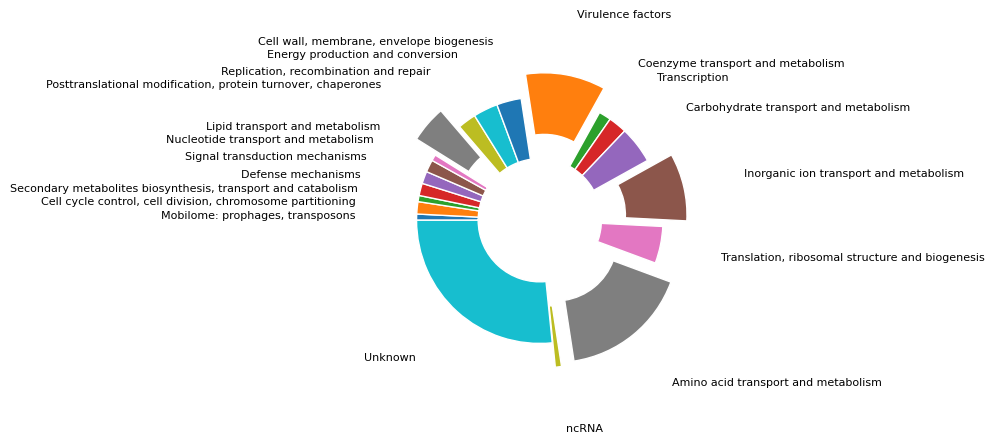

In [34]:
fig, ax = plt.subplots(figsize=(16, 4))

pie = ax.pie(sample_cases, explode=explode,
             labels=ontology, labeldistance=1.5,
             textprops={'fontsize': 8}, 
             wedgeprops=dict(width=0.5, edgecolor='w'),
             startangle=180, counterclock=False)

plt.show()

## <p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddeeff;border-radius:15px">Bar chart for protein expression analysis</p>

For the dessert we prepare a simple bar plot with error bars and labels for the significance interval. The file `input/expression.tsv` contains column names in the first line and no row index column. Subsequent columns describe GFP-fusion protein fluorescence measurements in different time points and are as follows: `time`, `mean` (a mean value for 3 replicates), `std` (standard deviation, our error term), `pval` (probability of $H_0$ that there are no difference when compared to $t_0$).


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">1. Load data to a DataFrame</p>

Based on the provided description of `input/expression.tsv` file, load the data from that file to a Pandas DataFrame `df`. Look up the first 5 rows to make sure the data have been loaded correctly.


In [350]:
df = pd.read_csv('input/expression.tsv', sep = '\t')
df.head()

,time,mean,std,pval
0,0,1345,67,1.0000
1,10,1389,105,0.8324
2,30,934,86,0.0232
3,90,566,98,0.0021
4,120,123,110,0.0003


---
<p style="font-family:Sans;font-size:12pt;font-weight:bold;padding:10px;margin:0px">2. The bar plot</p>

Following the lecture materials, prepare a bar plot depicting fluorescence `mean` values for subsequent times together with their `std` errors. <u>Do not</u> use `time` values for X values. Use automatically generated `df.index` integer values for that purpose, and then `time` values as labels for subsequent x-ticks.

Place a proper number of * for p-values (`*** p <= 0.001`, `** p <= 0.010`, `* p <= 0.050`). Use `ax.text()` for this purpose in a `for-loop` iterating over the rows of `df`. The text coordinates will be the row index and the sum of `mean`, `std` and some constant margin (eg. `10.0`). Center the text. Here you will find examples for [ax.text()](https://matplotlib.org/3.2.1/tutorials/text/text_props.html).

Make the plot as much similar to the one below as you can.

Save the plot to `output/bars.png` file with resolution set to 300 dpi and background to non-transparent.

<p style="background:#ffeedd;font-family:Sans;font-size:8pt;font-weight:bold;padding:10px">The expected output:</p>

<p style="background:#ddffee;font-family:Monospace;font-size:8pt;padding:10px;margin:0px">
<img width="300" src="ref/bars.png" alt="Linear regression">
</p>

In [352]:
print(df.index)

RangeIndex(start=0, stop=5, step=1)


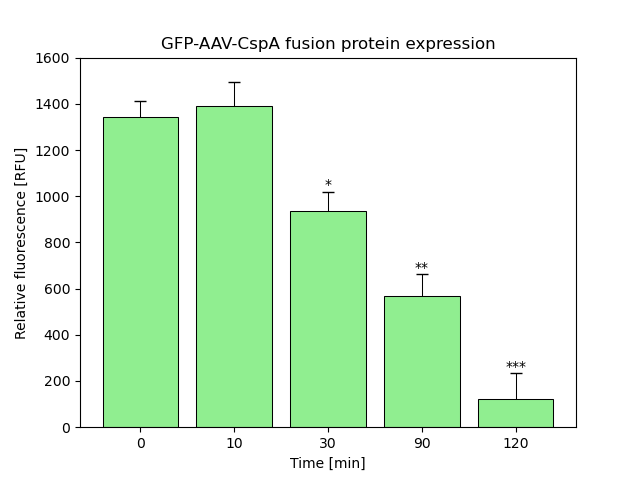

In [273]:
fig, ax = plt.subplots()
ax.bar(df.index, df['mean'], 
       color = '#90EE90', edgecolor = 'black', linewidth=0.75,
       zorder = 2)

ax.set_title('GFP-AAV-CspA fusion protein expression', fontsize = 12)
ax.set_xlabel('Time [min]')
ax.set_ylabel('Relative fluorescence [RFU]')
ax.set_ylim(0, 1600)
ax.set_xticks(df.index)
ax.set_xticklabels(df['time'])

for i, row in df.iterrows():
    pval = row[3]
    x = df.index[i]
    y = df['mean'][i]+df['std'][i]+10
    if pval <= 0.001:       
        s = '***'
    elif pval <= 0.010:
        s = '**'
    elif pval <= 0.050:
        s = '*'
    else:
        continue
    ax.text(x, y, s, horizontalalignment='center')      

plt.errorbar(df.index, df['mean'], yerr= df['std'],
             fmt='none', ecolor='black', capsize=4,
            linewidth = 0.75, zorder = 1)

plt.show()

fig.savefig('output/bars.png', dpi=300, transparent=False)

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddeeff;border-radius:15px">The End :)</p>